# DAB-304- Healthcare Analytics
# Final Project- Determine the best Machine Learning model to predict no-shows for appointments in Healthcare organisation

Date of submission: 2020-12-20

Group-3 & members:
- Name (ID): Abhinav Sharma (0753639)-sec:006
- Name (ID): Nishant Mahajan (0753638)-sec:001
- Name (ID): Prashanth Nuthula (0753653)-sec:005
- Name (ID): Sai Sahas Elluru (0753808)-sec:003
- Name (ID): Siddharth Singh (0756590)-sec:005

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization

## Data Description

In [111]:
noshow = pd.read_csv('No shows.csv')

In [112]:
noshow.shape

(110527, 14)

In [113]:
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [114]:
noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [115]:
noshow = noshow.drop(columns = ['PatientId', 'AppointmentID'], axis = 1)


- First dropping the unnecessary columns which are patient id and appointment id

In [116]:
noshow.ScheduledDay = pd.to_datetime(noshow['ScheduledDay']).dt.date.astype('datetime64[ns]')
noshow.AppointmentDay = pd.to_datetime(noshow['AppointmentDay']).dt.date.astype('datetime64[ns]')

- Converting date columns into datetime data type

In [117]:
noshow = noshow[(noshow.Age >= 0) & (noshow.Age <= 95)]

- From the describe function we can see that minimum value for age is in negative and maximum value 115. Both are impossible, so we have kept a threshold of age between 0 and 95.

In [118]:
noshow.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [119]:
print ("\nUnique values :  \n",noshow.nunique())


Unique values :  
 Gender              2
ScheduledDay      111
AppointmentDay     27
Age                96
Neighbourhood      81
Scholarship         2
Hipertension        2
Diabetes            2
Alcoholism          2
Handcap             5
SMS_received        2
No-show             2
dtype: int64


In [120]:
noshow.isnull().sum()/len(noshow.index)*100

Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

- Checking for duplicates and null values

In [121]:
noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110480 non-null  object        
 1   ScheduledDay    110480 non-null  datetime64[ns]
 2   AppointmentDay  110480 non-null  datetime64[ns]
 3   Age             110480 non-null  int64         
 4   Neighbourhood   110480 non-null  object        
 5   Scholarship     110480 non-null  int64         
 6   Hipertension    110480 non-null  int64         
 7   Diabetes        110480 non-null  int64         
 8   Alcoholism      110480 non-null  int64         
 9   Handcap         110480 non-null  int64         
 10  SMS_received    110480 non-null  int64         
 11  No-show         110480 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


- Using Info in pandas we have checked the datatypes of all columns

In [122]:
noshow = noshow.rename(columns={"No-show": "no_show", "Handcap": "Handicap", "Hipertension":"Hypertension"})

In [123]:
noshow['Scholarship'] = noshow['Scholarship'].astype('object')
noshow['Hypertension'] = noshow['Hypertension'].astype('object')
noshow['Diabetes'] = noshow['Diabetes'].astype('object')
noshow['Alcoholism'] = noshow['Alcoholism'].astype('object')
noshow['Handicap'] = noshow['Handicap'].astype('object')
noshow['SMS_received'] = noshow['SMS_received'].astype('object')

- Using pandas function converting all the categorical variables into object from int. Also renaming the mispelled column names.

In [124]:
noshow['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [125]:
noshow['absent'] = noshow['no_show'].replace(('No','Yes'),(0,1))

In [126]:
noshow = noshow.drop(columns= ['no_show'], axis = 1)

In [127]:
show     = noshow[noshow["absent"] == 0]
No_show = noshow[noshow["absent"] == 1]

In [128]:
print ('Patients who showed up', len(show))
print ('Patients who did not showed up', len(No_show))

Patients who showed up 88168
Patients who did not showed up 22312


In [129]:
noshow[(noshow.Age <= 0) & ((noshow.Hypertension.astype(int) == 1) |  (noshow.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,absent


In [130]:
np.sort(noshow['AppointmentDay'].unique())

array(['2016-04-29T00:00:00.000000000', '2016-05-02T00:00:00.000000000',
       '2016-05-03T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-06T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-10T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
       '2016-05-13T00:00:00.000000000', '2016-05-14T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-18T00:00:00.000000000', '2016-05-19T00:00:00.000000000',
       '2016-05-20T00:00:00.000000000', '2016-05-24T00:00:00.000000000',
       '2016-05-25T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-31T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-02T00:00:00.000000000', '2016-06-03T00:00:00.000000000',
       '2016-06-06T00:00:00.000000000', '2016-06-07T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000'], dtype='dat

In [131]:
np.sort(noshow['ScheduledDay'].unique())

array(['2015-11-10T00:00:00.000000000', '2015-12-03T00:00:00.000000000',
       '2015-12-07T00:00:00.000000000', '2015-12-08T00:00:00.000000000',
       '2015-12-14T00:00:00.000000000', '2015-12-15T00:00:00.000000000',
       '2016-01-04T00:00:00.000000000', '2016-01-05T00:00:00.000000000',
       '2016-01-07T00:00:00.000000000', '2016-01-11T00:00:00.000000000',
       '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
       '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000',
       '2016-01-21T00:00:00.000000000', '2016-01-22T00:00:00.000000000',
       '2016-01-25T00:00:00.000000000', '2016-01-26T00:00:00.000000000',
       '2016-01-27T00:00:00.000000000', '2016-01-28T00:00:00.000000000',
       '2016-01-29T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-02-02T00:00:00.000000000', '2016-02-03T00:00:00.000000000',
       '2016-02-04T00:00:00.000000000', '2016-02-05T00:00:00.000000000',
       '2016-02-11T00:00:00.000000000', '2016-02-12

- Checking for the unique values in the appointmentday and scheduledday columns.

In [132]:
noshow['waiting_days'] = (noshow.AppointmentDay - noshow.ScheduledDay).dt.days

- Sceduledday is the day on which a patient called the hospital for booking an appointment. Appointmentday is the day of actual appointment. So by substracting both of them we can get the number of waiting days.

In [133]:
noshow.waiting_days.unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

In [134]:
noshow = noshow[noshow.waiting_days >= 0]


- After checking unique values in the waiting days column, we can see there are some negative values which can be a data entry error. So, we have updated the column with the values greater than 0.

In [135]:
noshow.Gender.value_counts()

F    71799
M    38676
Name: Gender, dtype: int64

In [136]:
noshow.Scholarship.value_counts()

0    99614
1    10861
Name: Scholarship, dtype: int64

In [137]:
noshow.Hypertension.value_counts()

0    88702
1    21773
Name: Hypertension, dtype: int64

In [138]:
noshow.Diabetes.value_counts()

0    102538
1      7937
Name: Diabetes, dtype: int64

In [139]:
noshow.Alcoholism.value_counts()

0    107115
1      3360
Name: Alcoholism, dtype: int64

In [140]:
noshow.SMS_received.value_counts()

0    74997
1    35478
Name: SMS_received, dtype: int64

In [141]:
noshow['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7714
MARIA ORTIZ                    5804
RESISTÊNCIA                    4430
JARDIM DA PENHA                3874
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

- Using pandas we have checked for the unique values in all the columns to find any discrepencies.

In [142]:
noshow['Handicap'].value_counts()

0    108245
1      2032
2       182
3        13
4         3
Name: Handicap, dtype: int64

In [143]:
noshow = noshow[noshow['Handicap'] <= 1]

In [144]:
noshow.Handicap.unique()

array([0, 1], dtype=object)

- After checking the unique value in handicap column, we can see that there are values ranging from 0 to 4. Which cannot be possible, it should be either 0-Not handicapped and 1-handicapped. Using panadas we have updated the column with values only 0 and 1

In [145]:
values = []
for i in noshow.loc[:,'Age']:
    if i < 1:
        values.append('Infant')
    elif i >= 1 and i <= 4:
        values.append('Toddler')
    elif i > 4 and i <= 12:
        values.append('Child')
    elif i > 12 and i <= 19:
        values.append('Teen')
    elif i > 19 and i <= 25:
        values.append('Youth')
    elif i > 25 and i <= 65:
        values.append('Adult')
    else:
        values.append('Senior')

In [146]:
noshow["Age"] = values

In [147]:
noshow.Age.unique()

array(['Adult', 'Child', 'Senior', 'Youth', 'Teen', 'Toddler', 'Infant'],
      dtype=object)

- Using appropriate health website, we have transormed the age values into groups for better model building

## EDA

In [148]:
#labels
lab = noshow["absent"].value_counts().keys().tolist()
#values
val = noshow["absent"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Show vs. No-Show",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)

py.iplot(fig)


- We can see that 20.2% samples are of class 1, which is people who did not showed up. 79.8% samples are of class 0, which is people who did showed up.

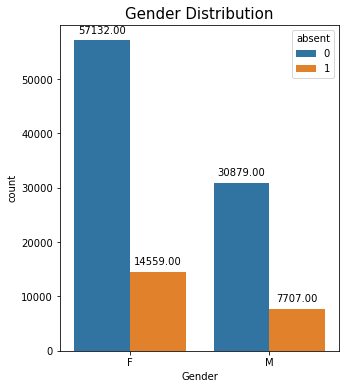

In [149]:


plt.figure(figsize=(5,6))
ax = sns.countplot(x="Gender", hue="absent", data=noshow)
ax.set_title('Gender Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- In above visualization, Patients w.r.t gender distribution is shown. The graph above states that the attendance of female patients is more on their appointments dates as compare to the male patients. And the count for female who never shown on there respective appointed dates is more than males This leads to a fact that the hospital may have more female patients. 

Text(0.5, 1.0, 'Neighborhood Distribution')

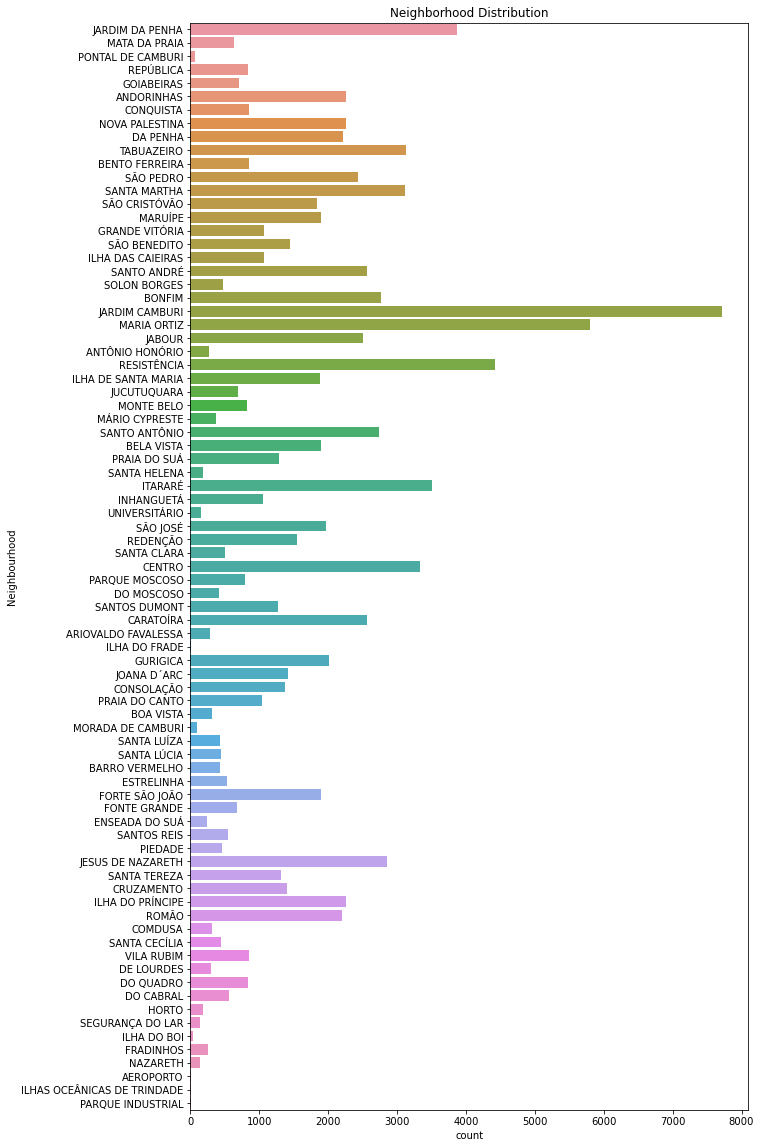

In [150]:
plt.figure(figsize=(10,20))
sns.countplot(y=noshow.Neighbourhood);
plt.title('Neighborhood Distribution')
#plt.yticks(rotation=90);

Text(0.5, 1.0, 'Neighborhood Distribution')

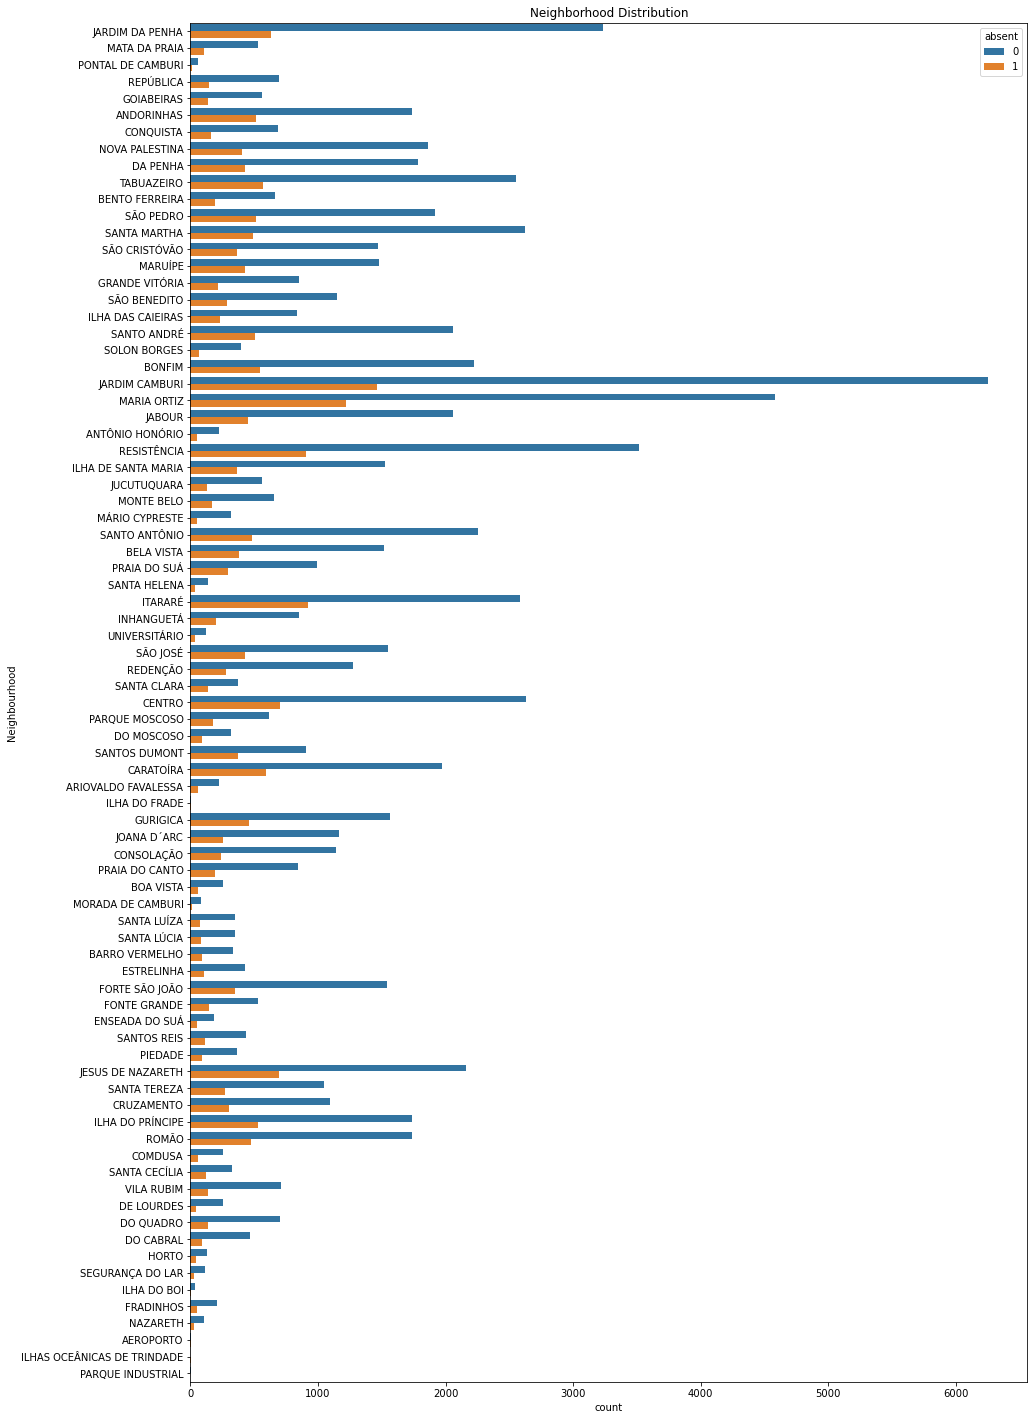

In [151]:
plt.figure(figsize=(15,25))
sns.countplot(y=noshow.Neighbourhood, hue = noshow['absent']);
plt.title('Neighborhood Distribution')

- People from neighbour hood distribution who showed up for more appointments and did not showed up for appointments  are Jardam camburi, maria Ortiz, 6% people from the jardam camburi showed for the appointment did not showed are 2%, from maria Ortiz who showed are 4.5% who did not showed are 1.8% and least number of people who did not showed up are from the Nazareth.

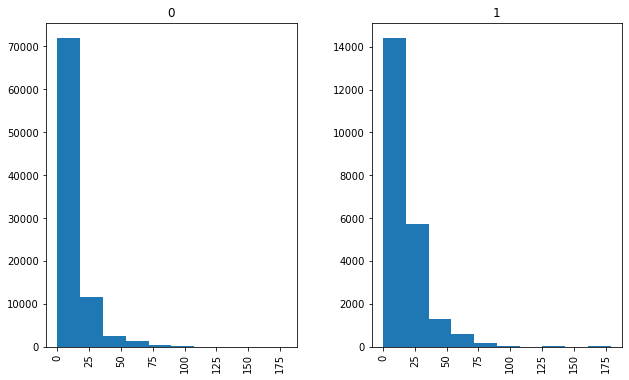

In [152]:
noshow['waiting_days'].hist(bins=10,by=noshow['absent'],figsize=(10,6));

- In the above visualization we focussed on the waiting days, which we created using scheduled days and appointment days, we can see more people who do not showed up for the appointments is in the range of 0 to 25 days, who showed up are in the range of 0 to 13 days.

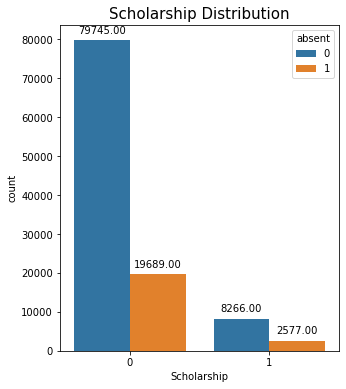

In [153]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x="Scholarship", hue="absent", data=noshow)
ax.set_title('Scholarship Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- From the scholarship distribution we observed that, out of the total people who have showed to the appointments are the people who do not have scholarships where as people who have scholarship and did not showed to the appointment are the less people with the count of 2577, and people with scholarship and showed to the appointment are 8266.

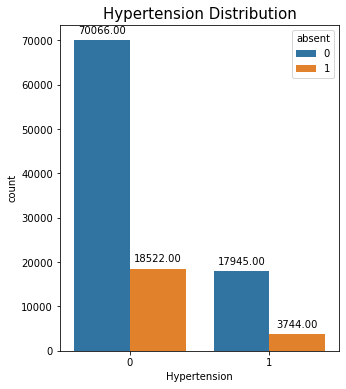

In [154]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x="Hypertension", hue="absent", data=noshow)
ax.set_title('Hypertension Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- From the overall people when we observed that people who are not having hypertension are more, but when we see our target variable where people who showed for the appointment we observed that people who  have hypertension and showed to the appointment are more nearly 83%, who do not showed are 19%,where as people without hypertension and showed to the appointment are 16.2%, people who do not showed up for the appointments are 3.3%. 


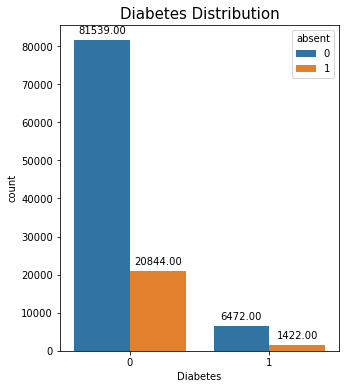

In [155]:

plt.figure(figsize=(5,6))
ax = sns.countplot(x="Diabetes", hue="absent", data=noshow)
ax.set_title('Diabetes Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- The above shows the diabities distribution of the people, We can see that most people who had diabities were present and very few people who did not ahve the problem did not show up, similar was in case of the people who did not had the problem but still showed up.

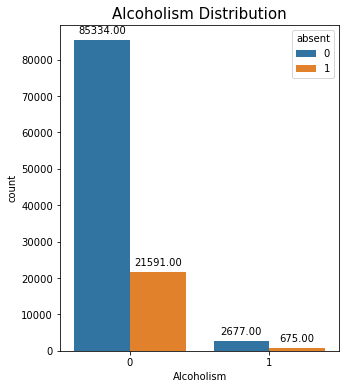

In [156]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x="Alcoholism", hue="absent", data=noshow)
ax.set_title('Alcoholism Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- In this graph we can see that the frequency of the patient have alcoholism issue is more and most them were present on their respective appointment dates and the 20% of the patients did not show on their appointment dates. However, the frequency patient without alcoholism is less.

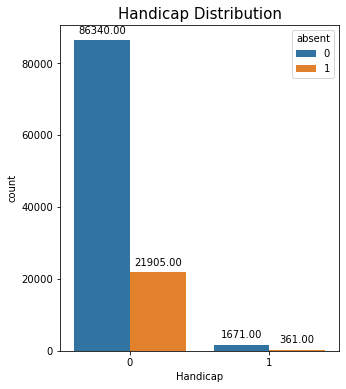

In [157]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x="Handicap", hue="absent", data=noshow)
ax.set_title('Handicap Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- In the visualization above we can state that the frequency of the handicapped customer on their appointment scheduled is very high. And no show is only 25%

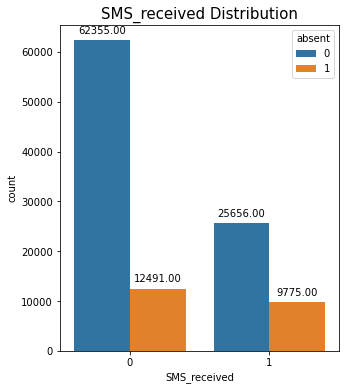

In [158]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x="SMS_received", hue="absent", data=noshow)
ax.set_title('SMS_received Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- From the SMS received distribution who did not received and do not showed are the 11.3% of total population, who showed are 56.5%. Who received and not showed are 8.9%, showed to the appointment are 23.2% of total population.

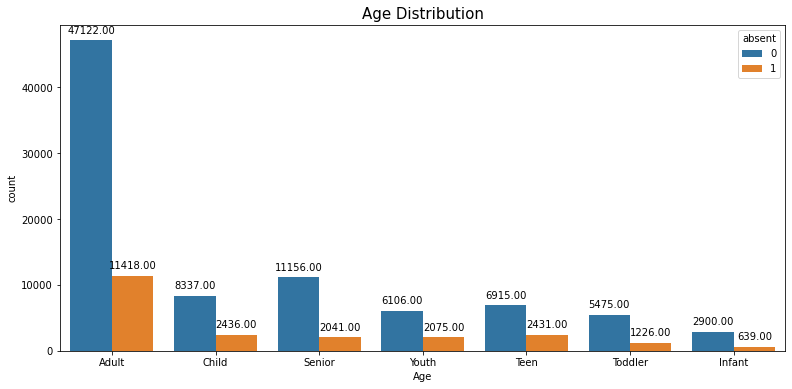

In [159]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x="Age", hue="absent", data=noshow)
ax.set_title('Age Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Form the age distribution we observed that the adult group of people are high among all the groups who did not showed up with 10.35%, showed up people are 43%, next is 7.5% child category who showed for appointment, who did not showed are 2.2% people, with 10.11% people from the senior category they showed for appointment, did not showed people are 1.9% from the seniors category, from the youth age 5.6% people went on scheduled time, 1.9% people did not went on scheduled time, 6.2% people went to for the appointment from the teen, 2.2% people not showed form the teen, 4.9% people from the toddler are for the appointment at the scheduled time,1.1% people went for the appointment on the scheduled time, 2.6% people went for the appointment from the infant, 0.6% people did not showed for the appointment from the infant. 

In [160]:
import datetime
from time import strftime
noshow['A_DOW'] = noshow['AppointmentDay'].dt.day_name()

In [161]:
week_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

- Using pandas we have got the day names from the appointmentday. This is done to check whether day of an appointment is affecting not showing of the patients.

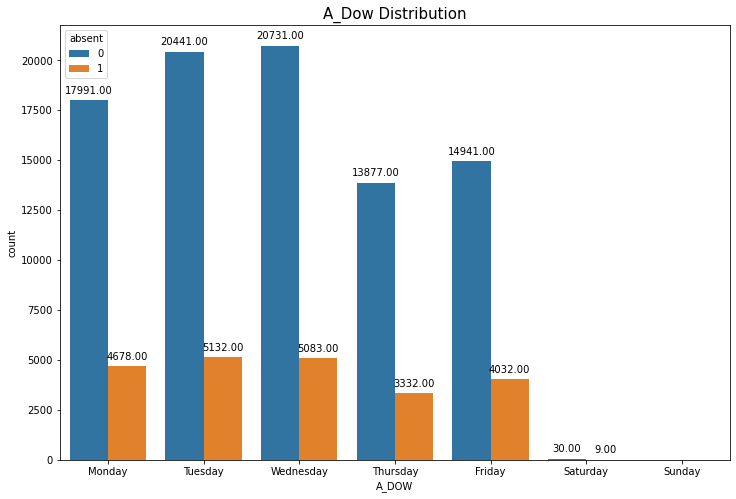

In [162]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="A_DOW", hue="absent", data=noshow, order= week_key)
ax.set_title('A_Dow Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- From the above graph we came to conclusion that during week ends the number of people who take appointments during Sunday the count is zero, during Saturday the count is very less, who showed on Monday are 16.3%, who do not showed are 4.24%, Tuesday who showed are 18.5%, did not showed 4.7%, Wednesday who showed are 18.7% who did not showed are 4.6%, in Thursday who showed are 12.5% who did not showed are 3%, people who showed Friday are 13.5% who did not showed are 3.6%. 

In [163]:
noshow['A_DOWn'] = noshow['AppointmentDay'].dt.weekday


## Data Preprocessing

In [164]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
noshow['Gender'] = le.fit_transform(noshow['Gender'])
noshow.Age.replace(('Infant','Toddler','Child', 'Teen','Youth','Adult','Senior'),(0,1,2,3,4,5,6),inplace=True)

In [165]:
noshow['Scholarship'] = le.fit_transform(noshow['Scholarship'])
noshow['Hypertension'] = le.fit_transform(noshow['Hypertension'])
noshow['Diabetes'] = le.fit_transform(noshow['Diabetes'])
noshow['Alcoholism'] = le.fit_transform(noshow['Alcoholism'])
noshow['SMS_received'] = le.fit_transform(noshow['SMS_received'])
noshow['Handicap'] = le.fit_transform(noshow['Handicap'])

- Using label encoder we have encoded all the categorical values into int.

In [166]:
import pandas as pd
from category_encoders import TargetEncoder
encoder = TargetEncoder()
noshow['Neighbourhood'] = encoder.fit_transform(noshow['Neighbourhood'], noshow['absent'])

C:\Users\saisa\Anaconda3\envs\DAB-300\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



- Using target encoding from the category_encoders we have encoded the neighborhood column. Target encoding first groups each place in the neighborhood and gets the number of occurrences.Using this occurrences, it calculates the probability of each place for the target and assign that value to that place.

In [167]:
noshow.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,absent,waiting_days,A_DOW,A_DOWn
0,0,2016-04-29,2016-04-29,5,0.163091,0,1,0,0,0,0,0,0,Friday,4
1,1,2016-04-29,2016-04-29,5,0.163091,0,0,0,0,0,0,0,0,Friday,4
2,0,2016-04-29,2016-04-29,5,0.172144,0,0,0,0,0,0,0,0,Friday,4
3,0,2016-04-29,2016-04-29,2,0.173913,0,0,0,0,0,0,0,0,Friday,4
4,0,2016-04-29,2016-04-29,5,0.163091,0,1,1,0,0,0,0,0,Friday,4


## Model Building

### Splitting

In [168]:
from sklearn.model_selection import train_test_split

features = noshow.drop(['absent', 'AppointmentDay', 'ScheduledDay', 'A_DOW'], axis=1)
labels = noshow['absent']

In [169]:
train_noshow, X_test, train_labels, y_test = train_test_split(features, labels, test_size=0.2, random_state=808)
X_train, X_val, y_train, y_val = train_test_split(train_noshow, train_labels, test_size=0.25, random_state=808)

### Feature Selection

In [170]:
#correlation
correlation = X_train.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
correlation

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,waiting_days,A_DOWn
Gender,1.000000,-0.150846,0.005325,-0.114533,-0.052156,-0.029810,0.102620,0.023870,-0.045791,-0.027305,0.002635
Age,-0.150846,1.000000,-0.035261,-0.025972,0.365243,0.209313,0.096561,0.066806,0.033689,0.025813,0.007584
Neighbourhood,0.005325,-0.035261,1.000000,0.048279,0.028242,0.009128,-0.002856,-0.005216,-0.005745,0.015640,-0.000522
Scholarship,-0.114533,-0.025972,0.048279,1.000000,-0.018728,-0.024683,0.036088,-0.012492,-0.000158,-0.034892,-0.001273
Hypertension,-0.052156,0.365243,0.028242,-0.018728,1.000000,0.432969,0.084300,0.085377,-0.004492,-0.017704,0.002706
Diabetes,-0.029810,0.209313,0.009128,-0.024683,0.432969,1.000000,0.014774,0.055381,-0.013565,-0.026648,0.005284
Alcoholism,0.102620,0.096561,-0.002856,0.036088,0.084300,0.014774,1.000000,0.004056,-0.024953,-0.036029,0.005909
Handicap,0.023870,0.066806,-0.005216,-0.012492,0.085377,0.055381,0.004056,1.000000,-0.024705,-0.020612,0.005240
SMS_received,-0.045791,0.033689,-0.005745,-0.000158,-0.004492,-0.013565,-0.024953,-0.024705,1.000000,0.399213,-0.090817
waiting_days,-0.027305,0.025813,0.015640,-0.034892,-0.017704,-0.026648,-0.036029,-0.020612,0.399213,1.000000,-0.014845


In [171]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [172]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [173]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

- Using pearson correlation coefficient, we have tried to get the most correlated variables and remove them. Because if there is high correlation then one of the either column is enough to build the model.

### Scaling

In [174]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

### Oversampling using SMOTE

In [175]:
unique, count = np.unique(y_train, return_counts=True)
labels_dict_value_count = { k:v for (k,v) in zip(unique, count)}
labels_dict_value_count

{0: 52844, 1: 13321}

In [176]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features=True, random_state=12)
X_train_scaled, y_train_res = sm.fit_sample(X_train_Scaled, y_train)

unique, count = np.unique(y_train_res, return_counts=True)
labels_dict_value_count = { k:v for (k,v) in zip(unique, count)}
labels_dict_value_count

{0: 52844, 1: 52844}

In [177]:
print(X_train_scaled.shape)
print(y_train_res.shape)
print(X_val_scaled.shape)
print(y_val.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(105688, 11)
(105688,)
(22056, 11)
(22056,)
(22056, 11)
(22056,)


### Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
clf_r = RandomForestClassifier(random_state = 808)
clf_r.fit(X_train_scaled, y_train_res)
y_val_pred = clf_r.predict(X_val_scaled)
accuracy_score(y_val,y_val_pred)

0.7318190061661226

In [179]:
params_r = {'max_depth': (35,37,40),
        'min_samples_leaf':(1,5,9), 'min_samples_split':(3,5.7)} 
grd_r = GridSearchCV(RandomForestClassifier(random_state = 808),params_r,scoring = 'accuracy',  cv=5, n_jobs=-1)
grd_r = grd_r.fit(X_train_scaled, y_train_res)
accuracy_r = grd_r.best_score_
print("Val score is "+str(grd_r.score(X_val_scaled,y_val)))
print("Best parameters:"+str(grd_r.best_params_))
print("Best grid search score:"+str(accuracy_r))
print("Best estimator:"+str(grd_r.best_estimator_))

Val score is 0.732816467174465
Best parameters:{'max_depth': 37, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best grid search score:0.8142748880733391
Best estimator:RandomForestClassifier(max_depth=37, min_samples_split=3, random_state=808)


In [180]:
clf_ra = RandomForestClassifier(random_state = 808, max_depth=37, min_samples_leaf=1, min_samples_split=3)
clf_ra.fit(X_train_scaled, y_train_res)
y_pred_ra = clf_ra.predict(X_test_scaled)

In [181]:
acc_ra=accuracy_score(y_test,y_pred_ra)
acc_ra

0.7316829887558941

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ra, labels=[1, 0])
cm

array([[ 1729,  2781],
       [ 3137, 14409]], dtype=int64)

<AxesSubplot:>

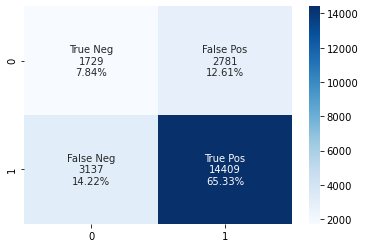

In [183]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [184]:
from sklearn.metrics import classification_report, precision_score,recall_score,f1_score
report_ra = classification_report(y_test, y_pred_ra)
print(report_ra)
pre_ra = precision_score(y_test, y_pred_ra)
print(pre_ra)
re_ra = recall_score(y_test, y_pred_ra)
print(re_ra)
f1_ra = f1_score(y_test, y_pred_ra)
print(f1_ra)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     17546
           1       0.36      0.38      0.37      4510

    accuracy                           0.73     22056
   macro avg       0.60      0.60      0.60     22056
weighted avg       0.74      0.73      0.74     22056

0.3553226469379367
0.383370288248337
0.3688139931740615


In [185]:
from sklearn.metrics import matthews_corrcoef

mcc_ra=matthews_corrcoef(y_test, y_pred_ra)
mcc_ra

0.19898626416329862

In [186]:
from sklearn.metrics import balanced_accuracy_score

bcr_ra=balanced_accuracy_score(y_test, y_pred_ra)
bcr_ra

0.6022915501426342

### Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
clf_L = LogisticRegression(random_state=808)
clf_L.fit(X_train_scaled, y_train_res)
y_val_pred = clf_L.predict(X_val_scaled)
accuracy_score(y_val,y_val_pred)

0.656601378309757

In [188]:
params_lr = {'max_iter':(10,50,100)} 


In [189]:
grid_search_lr = GridSearchCV(LogisticRegression(random_state=590), param_grid = params_lr,cv=10,scoring = 'accuracy', n_jobs = -1)
grid_search_lr = grid_search_lr.fit(X_train_scaled, y_train_res)
accuracy_lr = grid_search_lr.best_score_
print("Val score is "+str(grid_search_lr.score(X_val_scaled,y_val)))
print("Best parameters:"+str(grid_search_lr.best_params_))
print("Best grid search score:"+str(accuracy_lr))
print("Best estimator:"+str(grid_search_lr.best_estimator_))

Val score is 0.6618153790351832
Best parameters:{'max_iter': 10}
Best grid search score:0.6221614894845159
Best estimator:LogisticRegression(max_iter=10, random_state=590)


C:\Users\saisa\Anaconda3\envs\DAB-300\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [190]:
clf_lr=LogisticRegression(max_iter=10, random_state=808)
clf_lr.fit(X_train_scaled, y_train_res)
y_pred_lr = clf_lr.predict(X_test_scaled)

C:\Users\saisa\Anaconda3\envs\DAB-300\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [191]:
acc_lr = accuracy_score(y_test,y_pred_lr)
acc_lr

0.6603645266594124

In [192]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[12024,  5522],
       [ 1969,  2541]], dtype=int64)

<AxesSubplot:>

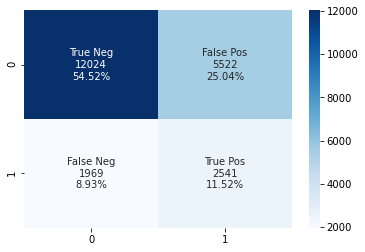

In [193]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr, annot=labels, fmt='', cmap='Blues')

In [194]:
from sklearn.metrics import classification_report, precision_score,recall_score,f1_score

report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)
pre_lr = precision_score(y_test, y_pred_lr)
print(pre_lr)
re_lr = recall_score(y_test, y_pred_lr)
print(re_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f1_lr)

              precision    recall  f1-score   support

           0       0.86      0.69      0.76     17546
           1       0.32      0.56      0.40      4510

    accuracy                           0.66     22056
   macro avg       0.59      0.62      0.58     22056
weighted avg       0.75      0.66      0.69     22056

0.3151432469304229
0.5634146341463414
0.40419947506561676


In [195]:
mcc_lr = matthews_corrcoef(y_test, y_pred_lr)


In [196]:
mcc_lr

0.2082800517548166

In [197]:
bcr_lr=balanced_accuracy_score(y_test, y_pred_lr)

In [198]:
bcr_lr

0.6243495147250572

### XGBoost

In [199]:
from xgboost import XGBClassifier
clf_X = XGBClassifier(random_state=808)
clf_X.fit(X_train_scaled, y_train_res)
y_val_pred = clf_X.predict(X_val_scaled)
accuracy_score(y_val,y_val_pred)

0.7864526659412405

In [200]:
params_XG={
 "max_depth"        : [9,11,13],
 "min_child_weight" : [1, 3, 5]
    }

In [201]:
grid_search_XG = GridSearchCV(XGBClassifier(random_state=808), param_grid = params_XG,scoring = 'accuracy',cv=5, n_jobs = -1)
grid_search_XG = grid_search_XG.fit(X_train_scaled, y_train_res)
accuracy_XG = grid_search_XG.best_score_
print("Val score is "+str(grid_search_XG.score(X_val_scaled,y_val)))
print("Best parameters:"+str(grid_search_XG.best_params_))
print("Best grid search score:"+str(accuracy_XG))
print("Best estimator:"+str(grid_search_XG.best_estimator_))

Val score is 0.7726242292346753
Best parameters:{'max_depth': 13, 'min_child_weight': 1}
Best grid search score:0.8377032555139639
Best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=808,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [202]:
clf_X = XGBClassifier(random_state=808, max_depth=13, min_child_weight=1)
clf_X.fit(X_train_scaled, y_train_res)
y_pred_X = clf_X.predict(X_test_scaled)

In [203]:
acc_X = accuracy_score(y_test,y_pred_X)
acc_X

0.7702212549873051

In [204]:
cm_X = confusion_matrix(y_test, y_pred_X)
cm_X

array([[15969,  1577],
       [ 3491,  1019]], dtype=int64)

<AxesSubplot:>

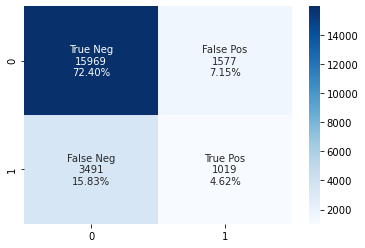

In [205]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_X.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_X.flatten()/np.sum(cm_X)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_X, annot=labels, fmt='', cmap='Blues')

In [206]:
report_X = classification_report(y_test, y_pred_X)
print(report_X)
pre_X = precision_score(y_test, y_pred_X)
print(pre_X)
re_X = recall_score(y_test, y_pred_X)
print(re_X)
f1_X = f1_score(y_test, y_pred_X)
print(f1_X)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     17546
           1       0.39      0.23      0.29      4510

    accuracy                           0.77     22056
   macro avg       0.61      0.57      0.57     22056
weighted avg       0.73      0.77      0.75     22056

0.3925269645608629
0.22594235033259424
0.28679988741908247


In [207]:
mcc_X = matthews_corrcoef(y_test, y_pred_X)
mcc_X

0.17029339842016356

In [208]:
bcr_X=balanced_accuracy_score(y_test, y_pred_X)
bcr_X

0.5680321577264248

### Bagging Classifier with Random Forest as base classifier

In [209]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
clf_B = BaggingClassifier()
clf_B.fit(X_train_scaled, y_train_res)
y_val_pred = clf_X.predict(X_val_scaled)
accuracy_score(y_val,y_val_pred)

0.7726242292346753

In [211]:
clf_B = BaggingClassifier(RandomForestClassifier(random_state = 808, max_depth=37, min_samples_leaf=1, min_samples_split=3))
clf_B.fit(X_train_scaled, y_train_res)
y_pred_B = clf_B.predict(X_test_scaled)

In [212]:
acc_B = accuracy_score(y_test,y_pred_B)
acc_B

0.7247914399709829

In [213]:
cm_B = confusion_matrix(y_test, y_pred_B)
cm_B

array([[14163,  3383],
       [ 2687,  1823]], dtype=int64)

<AxesSubplot:>

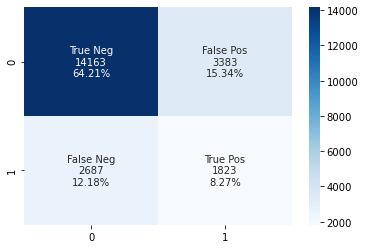

In [214]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_B.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_B.flatten()/np.sum(cm_B)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_B, annot=labels, fmt='', cmap='Blues')



In [215]:
report_B = classification_report(y_test, y_pred_B)
print(report_B)
pre_B = precision_score(y_test, y_pred_B)
print(pre_B)
re_B = recall_score(y_test, y_pred_B)
print(re_B)
f1_B = f1_score(y_test, y_pred_B)
print(f1_B)



              precision    recall  f1-score   support

           0       0.84      0.81      0.82     17546
           1       0.35      0.40      0.38      4510

    accuracy                           0.72     22056
   macro avg       0.60      0.61      0.60     22056
weighted avg       0.74      0.72      0.73     22056

0.3501728774490972
0.4042128603104213
0.37525730753396463


In [216]:
mcc_B = matthews_corrcoef(y_test, y_pred_B)
mcc_B



0.20078965805365004

In [217]:
bcr_B=balanced_accuracy_score(y_test, y_pred_B)
bcr_B

0.6057026914113374

## Conclusion

In [218]:
performance = {'Model Name':['Random Forest','Logistic Regression','XGBoost','Bagging Classifier'],
        'Accuracies':[acc_ra,acc_lr,acc_X,acc_B],
        'MCC':[mcc_ra,mcc_lr,mcc_X,mcc_B],
        'BCR':[bcr_ra,bcr_lr,bcr_X,bcr_B]}

Metrics = pd.DataFrame(performance, columns = ['Model Name','Accuracies','MCC','BCR'])
Metrics

,Model Name,Accuracies,MCC,BCR
0,Random Forest,0.731683,0.198986,0.602292
1,Logistic Regression,0.660365,0.208280,0.624350
2,XGBoost,0.770221,0.170293,0.568032
3,Bagging Classifier,0.724791,0.200790,0.605703


- In colnclusion we can say that though XGBoost has better accuracy when compared to other models, in reality this model does not work. Because XGBoost has high type II error and low MCC & BCR when compared to other models. So, we suggest using Bagging classifier with random forest as base learner or Random Forest, because it has got low type-II errors and high MCC & BCR. Using this model healthcare organisations can create an app where it can send auto remainders to the potential no show patients.